In [1]:
from mnist import *
from convvisual import *
import lasagne
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import RandomState

%load_ext autoreload
%autoreload 2

import logging,sys

log = logging.getLogger()
log.setLevel(logging.DEBUG)
log.addHandler(logging.StreamHandler(sys.stdout))

Using gpu device 0: GeForce GTX 780 (CNMeM is disabled, cuDNN 5005)


### Load data

In [2]:
init_theano()

train,val,test = get_mnist_data('/home/hartmank/data/mnist/mnist.pkl.gz')
X_train, y_train = train
X_val, y_val = val
X_test, y_test = test

rng = RandomState(98787)
X_train_topo,X_train_flat,y_train = create_two_digit_data(X_train,y_train)
rng = RandomState(98787)
X_val_topo,X_val_flat,y_val = create_two_digit_data(X_val,y_val)
rng = RandomState(98787)
X_test_topo,X_test_flat,y_test = create_two_digit_data(X_test,y_test)

1


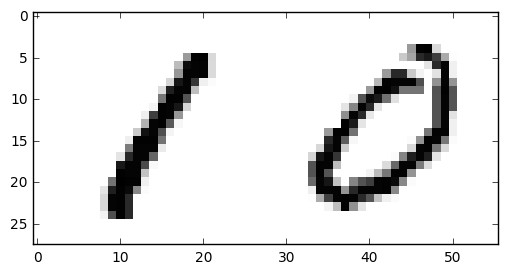

In [3]:
from matplotlib import  cm
plt.imshow(X_train_topo[3], interpolation='nearest', cmap=cm.Greys)
print(y_train[3])

### Create and train ConvNet

In [4]:
l_out = create_mnist_net_twodigit()

In [5]:
batch_rng = RandomState(37463764)
train_mnist(l_out,X_train_flat,y_train,rng=batch_rng,log=log,X_val=X_val_flat,y_val=y_val)

/home/hartmank/braindecode/vienv/local/lib/python2.7/site-packages/lasagne/layers/pool.py:266: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode=self.mode,
/home/hartmank/braindecode/vienv/local/lib/python2.7/site-packages/lasagne/layers/pool.py:266: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode=self.mode,
/home/hartmank/braindecode/vienv/local/lib/python2.7/site-packages/lasagne/layers/pool.py:266: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode=self.mode,


Epoch: 0
Train:
loss: 2.3016
acc: 0.12
Validation:
loss: 2.3026
acc: 0.12


mnist.py:96: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val!=None:


Epoch: 1
Train:
loss: 1.4261
acc: 0.55
Validation:
loss: 1.4024
acc: 0.56


mnist.py:112: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val!=None:


Epoch: 2
Train:
loss: 0.8989
acc: 0.73
Validation:
loss: 0.8578
acc: 0.74
Epoch: 3
Train:
loss: 0.7649
acc: 0.76
Validation:
loss: 0.7230
acc: 0.77
Epoch: 4
Train:
loss: 0.7152
acc: 0.77
Validation:
loss: 0.6798
acc: 0.78
Epoch: 5
Train:
loss: 0.6745
acc: 0.79
Validation:
loss: 0.6454
acc: 0.79
Epoch: 6
Train:
loss: 0.6445
acc: 0.79
Validation:
loss: 0.6206
acc: 0.80
Epoch: 7
Train:
loss: 0.6255
acc: 0.80
Validation:
loss: 0.6031
acc: 0.80
Epoch: 8
Train:
loss: 0.6070
acc: 0.80
Validation:
loss: 0.5875
acc: 0.81
Epoch: 9
Train:
loss: 0.5945
acc: 0.81
Validation:
loss: 0.5810
acc: 0.81
Epoch: 10
Train:
loss: 0.5787
acc: 0.81
Validation:
loss: 0.5652
acc: 0.82
Epoch: 11
Train:
loss: 0.5702
acc: 0.82
Validation:
loss: 0.5591
acc: 0.82
Epoch: 12
Train:
loss: 0.5534
acc: 0.82
Validation:
loss: 0.5475
acc: 0.82
Epoch: 13
Train:
loss: 0.5456
acc: 0.82
Validation:
loss: 0.5388
acc: 0.82
Epoch: 14
Train:
loss: 0.5380
acc: 0.83
Validation:
loss: 0.5313
acc: 0.82
Epoch: 15
Train:
loss: 0.5298
acc

### Get outputs for test data

In [6]:
from braindecode.veganlasagne.layer_util import print_layers
layers = lasagne.layers.get_all_layers(l_out)
print_layers(layers)
test_outputs = lasagne.layers.get_output(layers,X_test_flat)

 0-InputLayer                                                         (None, 1568)
 1-ReshapeLayer                                                       (None, 1, 28, 56)
 2-Conv2DLayer              3x3                       elu             (None, 3, 26, 54)
 3-Pool2DLayer              2x2 ::2 ::2               max             (None, 3, 13, 27)
 4-Conv2DLayer              2x2                       elu             (None, 3, 12, 26)
 5-Pool2DLayer              2x2 ::2 ::2               max             (None, 3, 6, 13)
 6-Conv2DLayer              3x2                       elu             (None, 3, 4, 12)
 7-Pool2DLayer              2x2 ::2 ::2               max             (None, 3, 2, 6)
 8-Conv2DLayer              2x6                       rectify         (None, 10, 1, 1)
 9-FlattenLayer                                                       (None, 10)
10-NonlinearityLayer                                  softmax        



### Get receptive field for one class neuron

In [7]:
number = 4 #class neuron

l_RF = receptive_field_build_deconv_layers(layers[8],layers[2],use_learned_W=False)

#100 inputs with highest output in class neuron
output_l_out = test_outputs[10].eval()
max_outputs_0 = np.argsort(output_l_out[:,number])[-100:]

#Create input for deconv net and get output (original input)
Y_in = np.zeros((1,10,1,1),dtype=np.float32)
Y_in[0,number,0,0]=1
RF_output = lasagne.layers.get_output(l_RF,Y_in)
RF_output = RF_output[0].eval().squeeze()>0

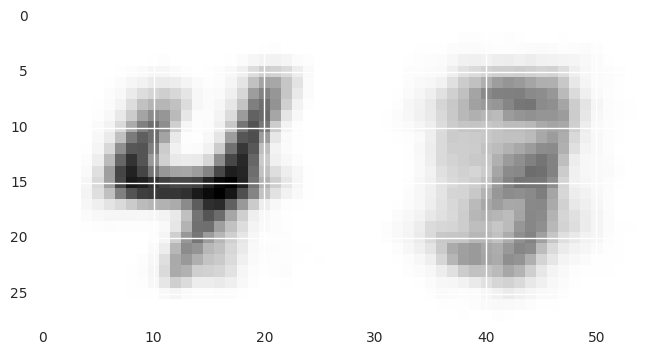

In [8]:
#mean intput for high activation in class neuron
output_0_mean = X_test_topo[max_outputs_0,:,:].mean(axis=0)
output_0_mean_RF = np.zeros(output_0_mean.shape)
output_0_mean_RF[RF_output] = output_0_mean[RF_output]
from matplotlib import  cm
plt.imshow(output_0_mean_RF, interpolation='nearest', cmap=cm.Greys)

### Get receptive field and mean input for best responsive neuron for a class in a layer

In [9]:
layer = 6
#Get mean activations 
output_l_out = test_outputs[layer].eval()
output_l_out_max = output_l_out[max_outputs_0,:,:,:]
output_l_out_max = abs(output_l_out_max).mean(axis=0)

#Create new input (set unit activation of specific neuron to 1)
dims = list([1])+list(output_l_out_max.shape)
print(dims)
max_ind = output_l_out_max.flatten().argsort()[-1:]
print(max_ind)
max_ind = np.unravel_index(max_ind,dims)
Y_in = np.zeros(dims,dtype=np.float32)
Y_in[max_ind] = 1

l_RF = receptive_field_build_deconv_layers(layers[layer],layers[2],use_learned_W=False)

RF_output = lasagne.layers.get_output(l_RF,Y_in)
RF_output = RF_output[0].eval().squeeze()>0

[1, 3, 4, 12]
[86]


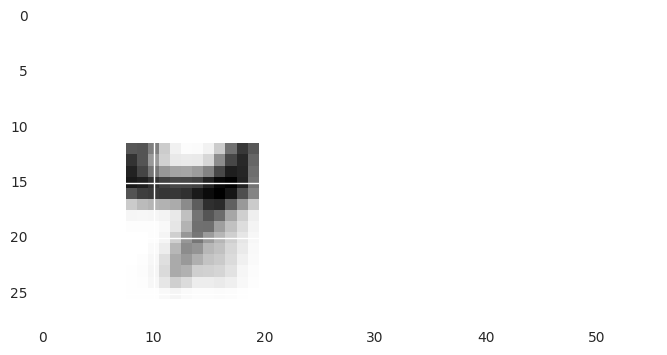

In [10]:
output_0_mean_RF = np.zeros(output_0_mean.shape)
output_0_mean_RF[RF_output] = output_0_mean[RF_output]
from matplotlib import  cm
plt.imshow(output_0_mean_RF, interpolation='nearest', cmap=cm.Greys)

### Get 10 highest unit activations in specific filter of layer and plot receptive fields of neurons on the input

In [16]:
layer = 8
filter = 9

#Get highest input/unit activation combination
output_l = test_outputs[layer].eval()
output_l_f = abs(output_l[:,filter,:,:])
output_l_f_flat = output_l_f.flatten()
print(output_l_f.shape)
max_ind = output_l_f_flat.argsort()[::-1]
max_ind = np.unravel_index(max_ind[:10],output_l_f.shape)

#Dirty creation of inputs for highest activated neurons in layer
Y_in = np.zeros((len(max_ind[0]),output_l.shape[1],output_l.shape[2],output_l.shape[3]),dtype=np.float32)
print(Y_in.shape)
print(max_ind)
Y_in[np.arange(len(max_ind[0])),filter,max_ind[1],max_ind[2]] = 1
print(Y_in.shape)

l_RF = receptive_field_build_deconv_layers(layers[layer],layers[2],use_learned_W=False)

RF_output = lasagne.layers.get_output(l_RF,Y_in)
RF_output = RF_output.eval().squeeze()>0

(10000, 1, 1)
(10, 10, 1, 1)
(array([5610, 4012, 5582, 9408, 9522, 6251, 5640, 3857, 4027, 4988]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
(10, 10, 1, 1)


(10, 28, 56)
(28, 56)


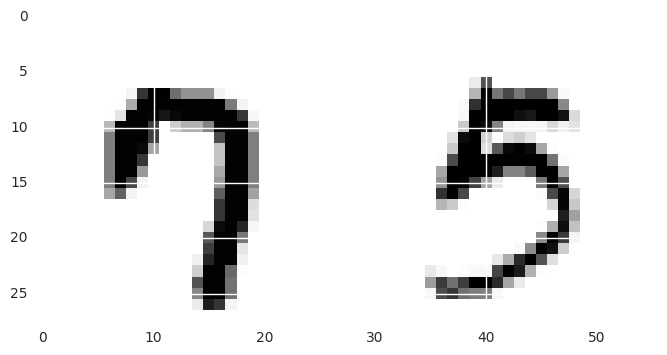

(28, 56)


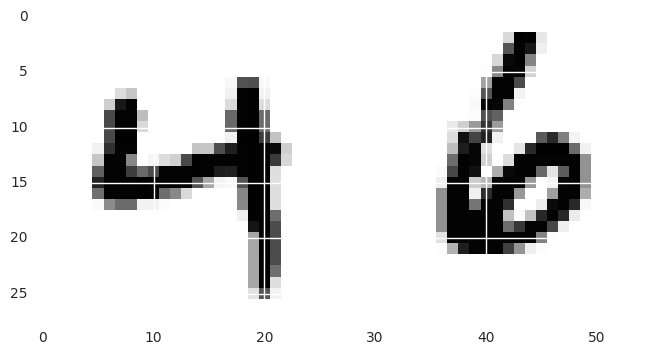

(28, 56)


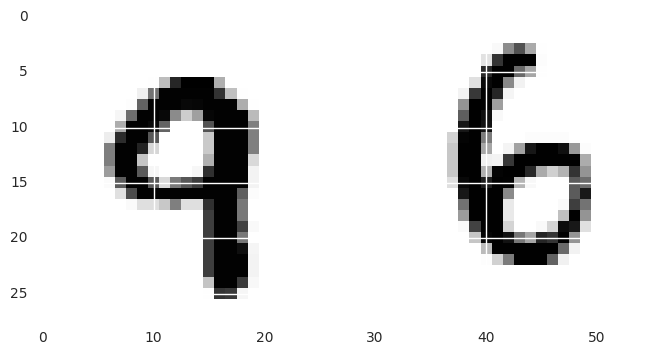

(28, 56)


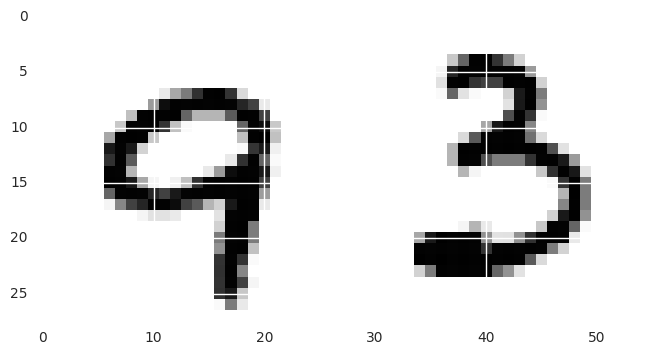

(28, 56)


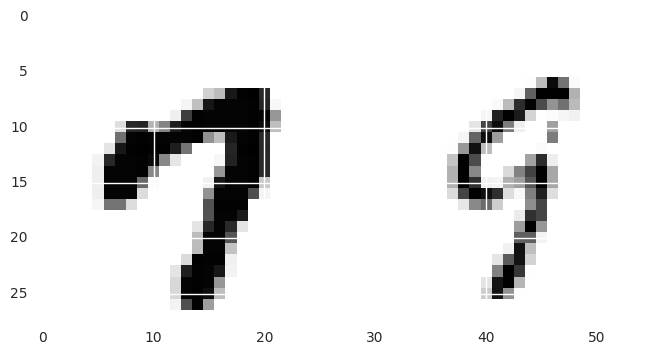

(28, 56)


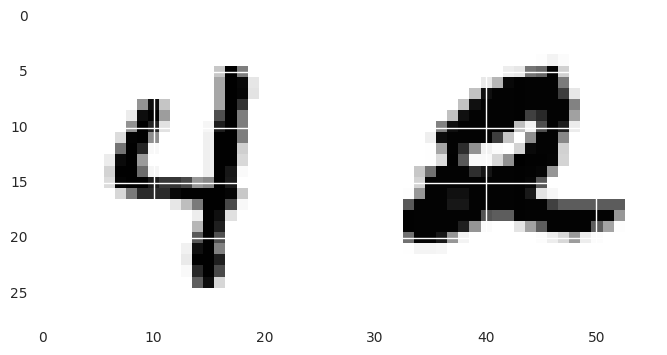

(28, 56)


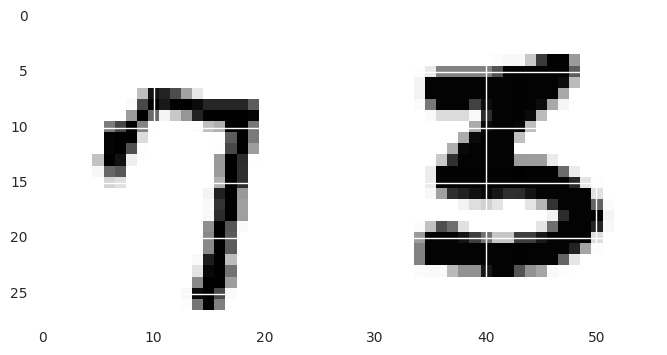

(28, 56)


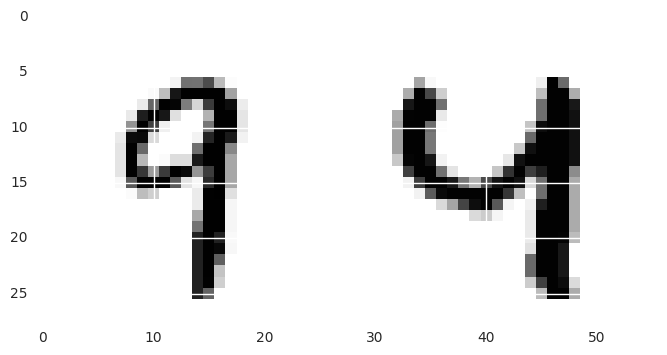

(28, 56)


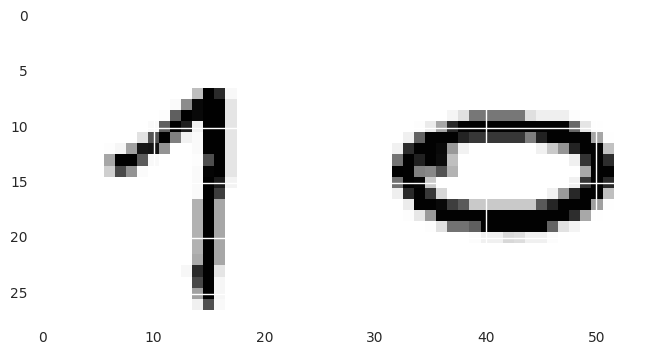

(28, 56)


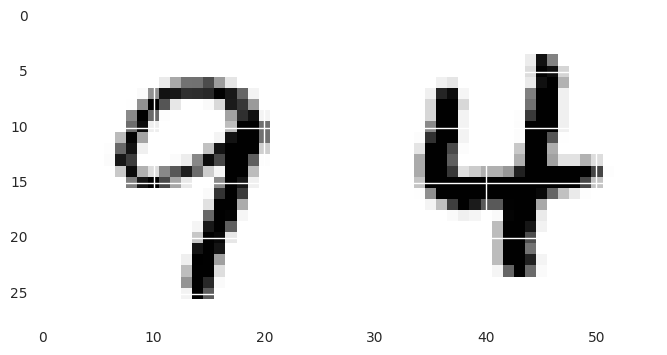

In [17]:
print(RF_output.shape)
for i in np.arange(len(RF_output)):
    X = X_test_topo[max_ind[0][i],:,:]
    print(X.shape)
    X_RF = np.zeros(X.shape)
    X_RF[RF_output[i,:,:]] = X[RF_output[i,:,:]]
    plt.imshow(X_RF, interpolation='nearest', cmap=cm.Greys)
    plt.show()

In [19]:
layer = 8
filter = 9

#Get highest input/unit activation combination
output_l = test_outputs[layer].eval()
output_l_f = abs(output_l)
mask = np.ones(output_l_f.shape)
mask[:,filter,:,:] = 0
output_l_f[mask==1] = 0
output_l_f_flat = output_l_f.flatten()
print(output_l_f.shape)
max_ind = output_l_f_flat.argsort()[::-1]
max_ind = np.unravel_index(max_ind[:10],output_l_f.shape)
print(max_ind)
max_ind = np.asarray(max_ind).T
print(max_ind)

l_RF = receptive_field_build_deconv_layers(layers[layer],layers[2],use_learned_W=False)
print(dir(lasagne.layers.get_all_layers(l_RF)[0]))

RF_output = get_receptive_field_mask(max_ind[:,1:],
                                    l_RF)
print(RF_output.shape)

(10000, 10, 1, 1)
(array([5610, 4012, 5582, 9408, 9522, 6251, 5640, 3857, 4027, 4988]), array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
[[5610    9    0    0]
 [4012    9    0    0]
 [5582    9    0    0]
 [9408    9    0    0]
 [9522    9    0    0]
 [6251    9    0    0]
 [5640    9    0    0]
 [3857    9    0    0]
 [4027    9    0    0]
 [4988    9    0    0]]
['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_param', 'get_output_for', 'get_output_shape_for', 'get_params', 'input_var', 'name', 'output_shape', 'params', 'shape']
(10, 1, 28, 56)


(10, 1, 28, 56)
(28, 56)
(28, 56)


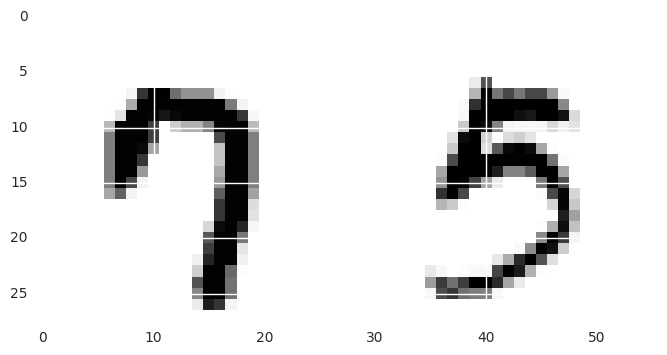

(28, 56)
(28, 56)


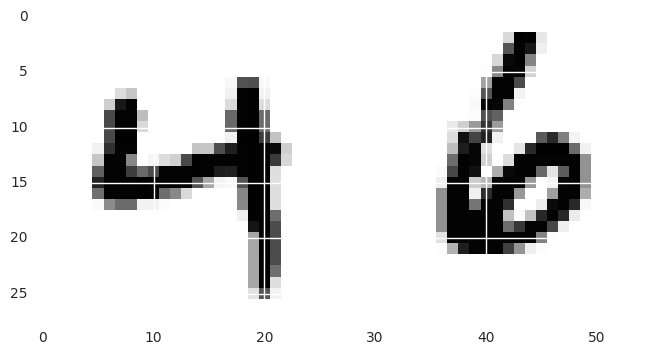

(28, 56)
(28, 56)


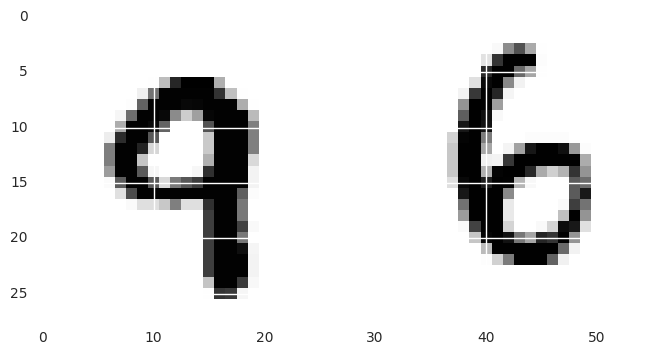

(28, 56)
(28, 56)


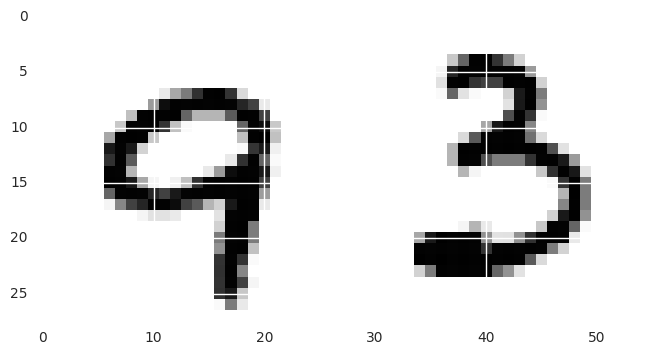

(28, 56)
(28, 56)


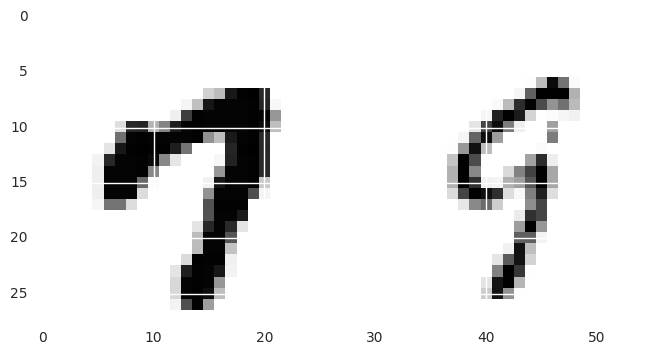

(28, 56)
(28, 56)


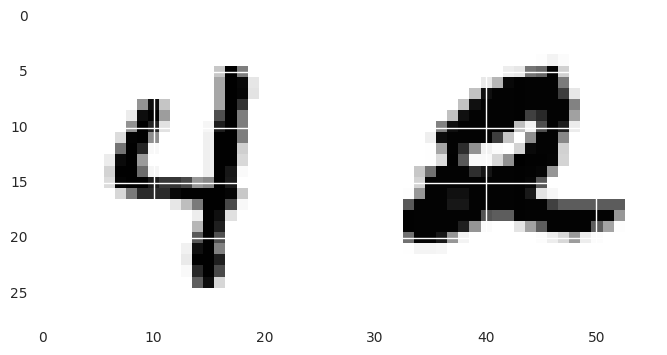

(28, 56)
(28, 56)


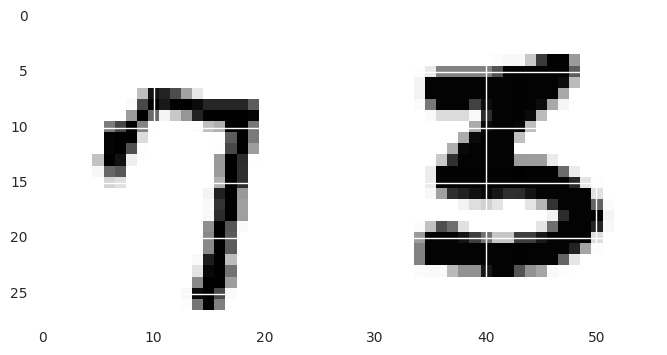

(28, 56)
(28, 56)


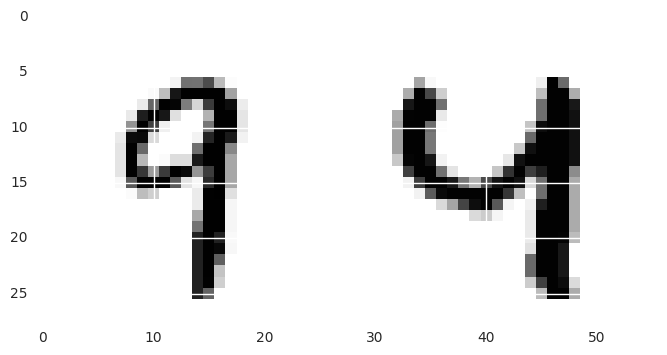

(28, 56)
(28, 56)


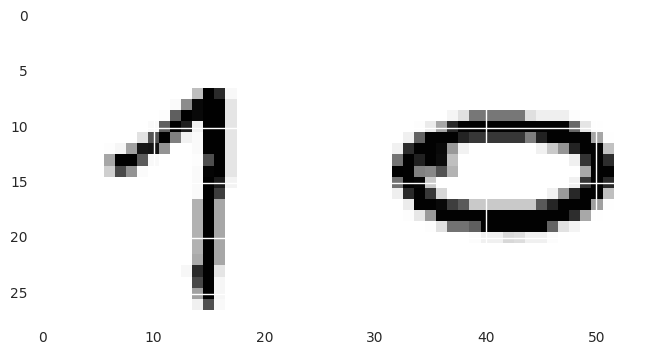

(28, 56)
(28, 56)


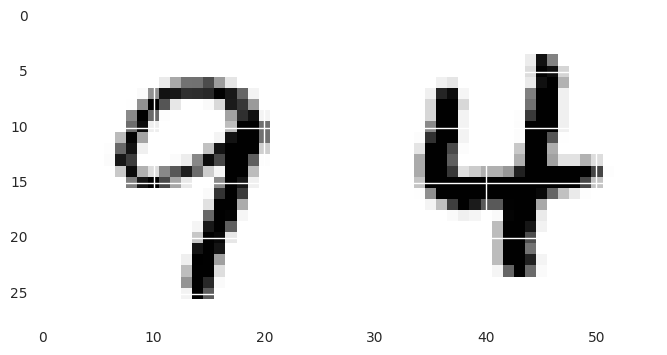

In [20]:
print(RF_output.shape)
for i in np.arange(len(RF_output)):
    X = X_test_topo[max_ind[i,0],:,:]
    print(X.shape)
    X_RF = np.zeros(X.shape)
    mask = RF_output[i,0,:,:]>0
    print(mask.shape)
    X_RF[RF_output[i,0,:,:]>0] = X[RF_output[i,0,:,:]>0]
    plt.imshow(X_RF, interpolation='nearest', cmap=cm.Greys)
    plt.show()

(10, 4)
(10, 1, 28, 56)
(10000, 28, 56) (10, 4)


/home/hartmank/braindecode/vienv/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10000 but corresponding boolean dimension is 10


(10, 1, 28, 56)


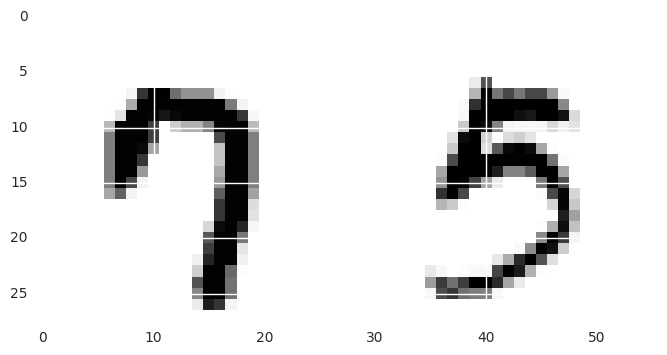

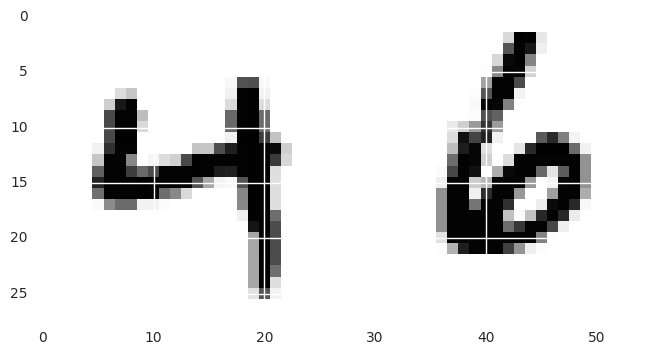

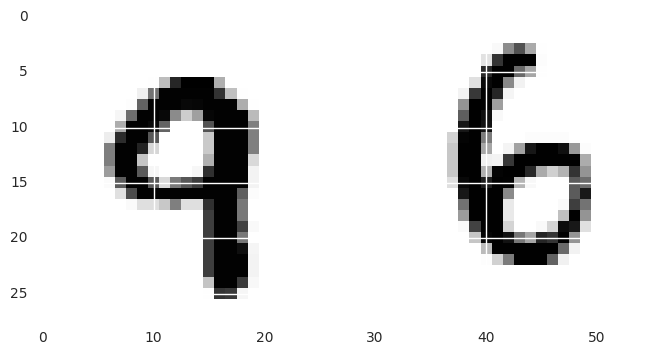

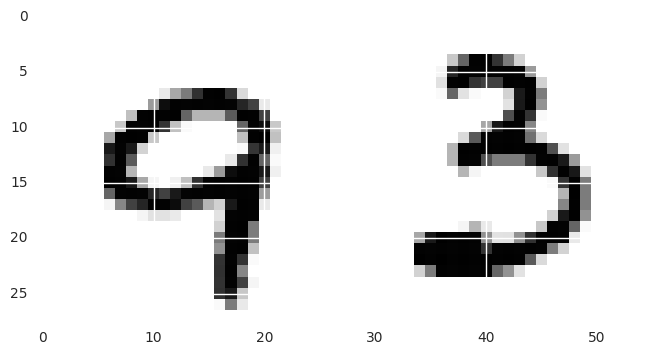

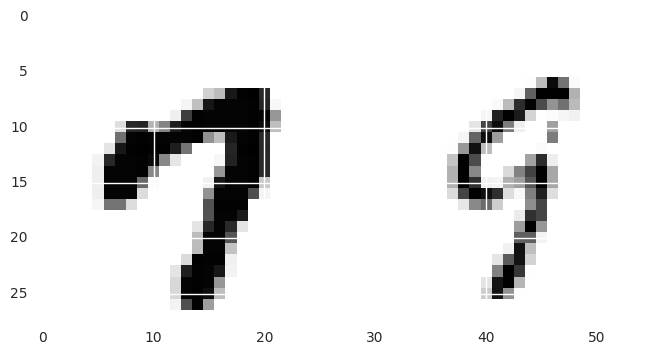

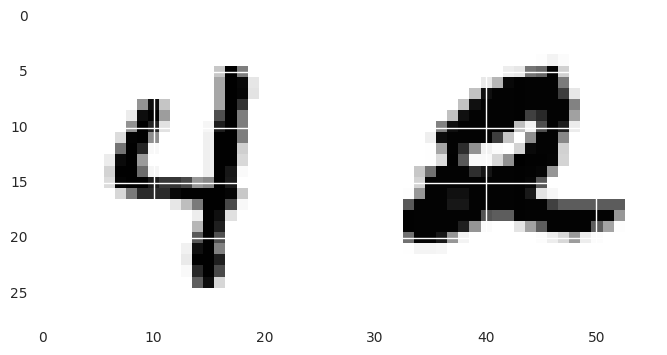

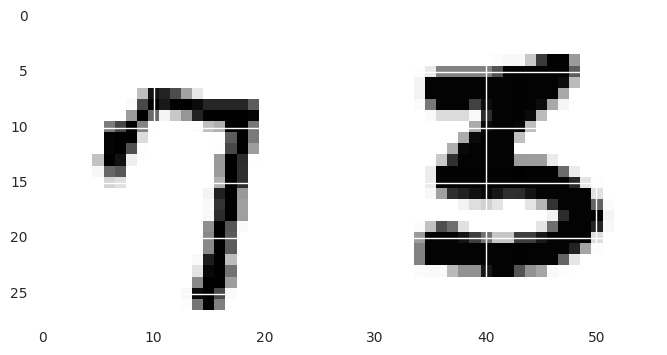

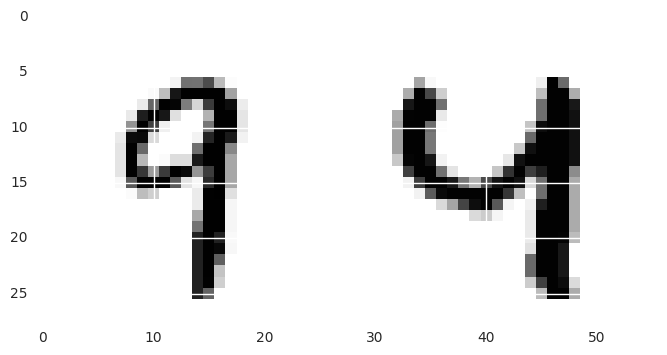

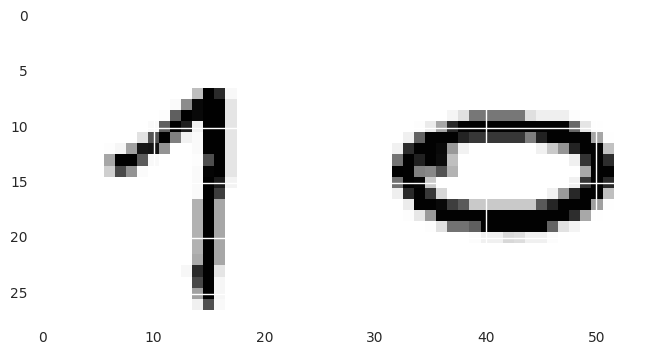

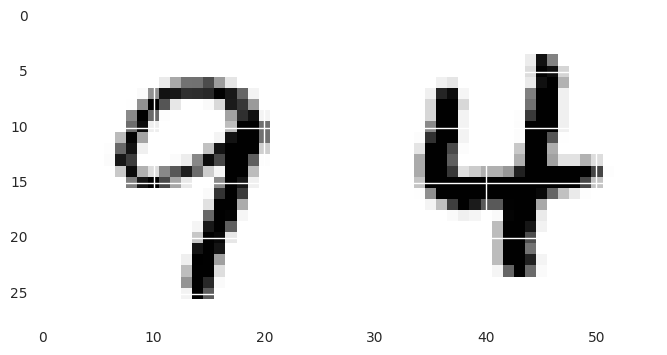

In [21]:
print(max_ind.shape)
X = X_test_topo
print(RF_output.shape)
X_RF = np.zeros(X.shape)
mask = RF_output[:,0,:,:]>0
X_RF[RF_output[:,0,:,:]>0] = X[RF_output[:,0,:,:]>0]

X_RF = get_receptive_field_masked_inputs(X,max_ind,l_RF)

for i in np.arange(len(RF_output)):
    plt.imshow(X_RF[i], interpolation='nearest', cmap=cm.Greys)
    plt.show()

(10000, 3, 4, 12)
(array([2048, 5482, 8892, ..., 4640, 4640,    0]), array([2, 2, 2, ..., 1, 1, 0]), array([3, 3, 3, ..., 3, 3, 0]), array([8, 1, 8, ..., 8, 7, 0]))
bsd
(10, 1, 28, 56)
(10000, 28, 56) (10, 4)
(10, 1, 28, 56)


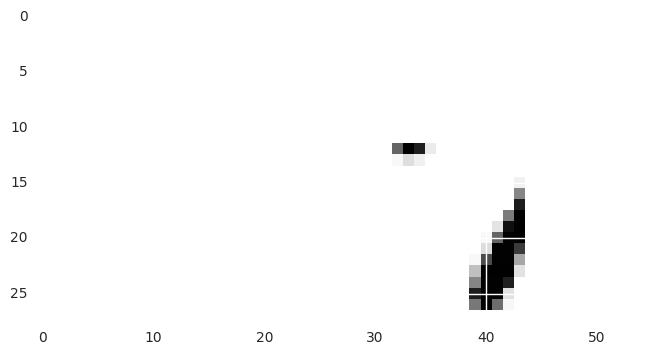

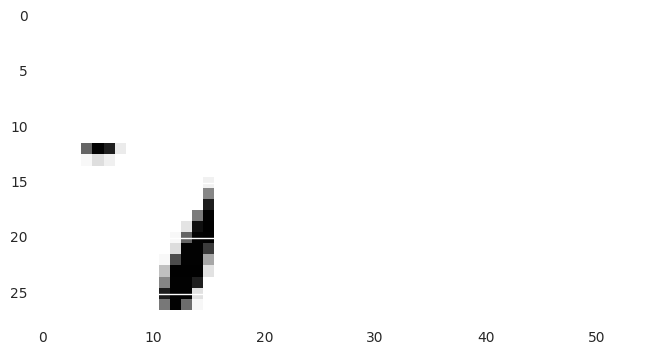

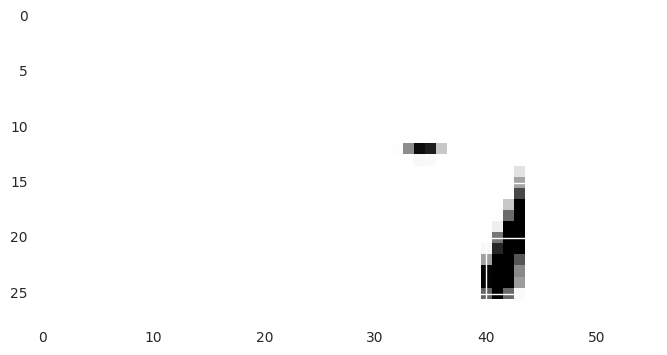

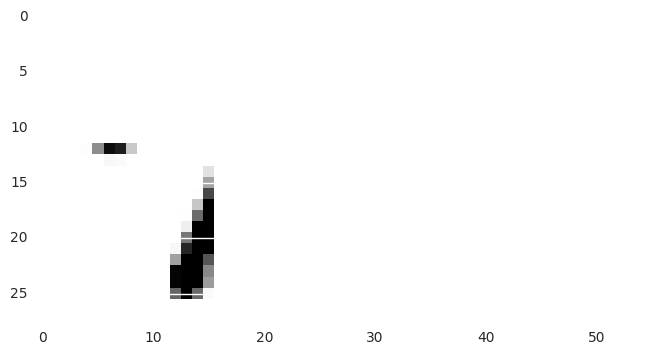

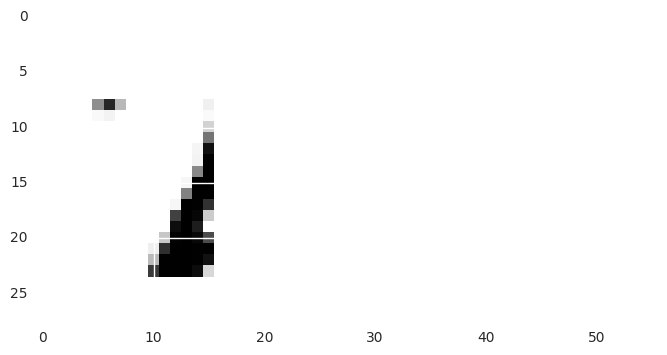

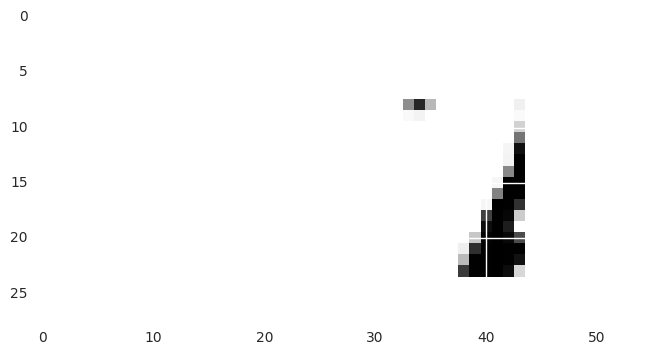

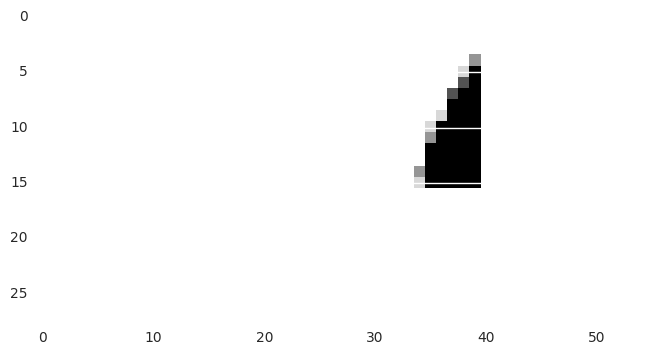

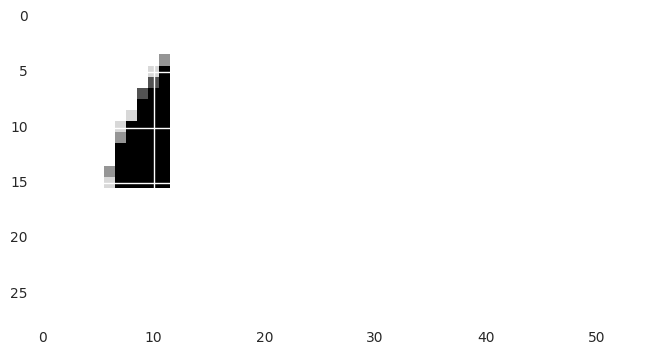

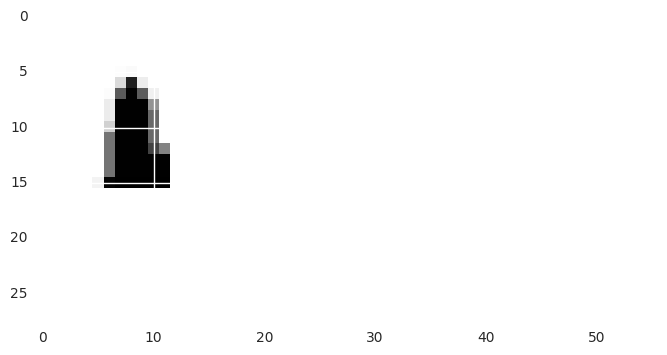

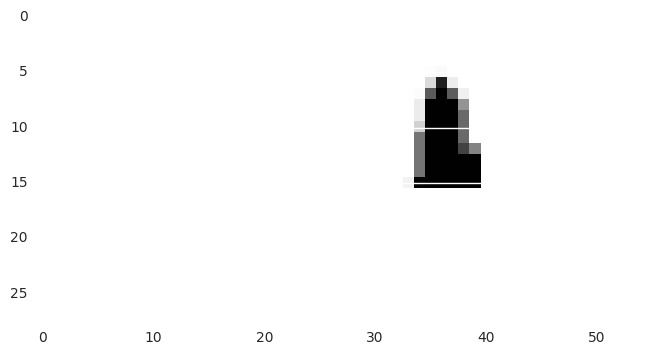

In [30]:
layer = 6
filter = 2

#Get highest input/unit activation combination
max_ind = get_most_active_units_in_layer(X_test_flat,layers,layer,n_units=10,filter=filter)
l_RF = receptive_field_build_deconv_layers(layers[layer],layers[2],use_learned_W=False)

RF_output = get_receptive_field_mask(max_ind,l_RF)
print(RF_output.shape)

X_RF = get_receptive_field_masked_inputs(X_test_topo,max_ind,l_RF)

for i in np.arange(len(RF_output)):
    plt.imshow(X_RF[i], interpolation='nearest', cmap=cm.Greys)
    plt.show()